<a href="https://colab.research.google.com/github/filipesartori/Segmenta-oPython/blob/main/Segmenta%C3%A7%C3%A3o_em_watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/Colab\ Notebooks/Segmentação\ Python/imagens/ imagens/

In [4]:
def mostrar(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

Segmentação com WaterShed

In [6]:
img = cv2.imread('/content/imagens/moedas03.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
dilatacao = cv2.dilate(thresh, np.ones((3, 3), np.uint8), iterations = 2)
seg = cv2.erode(dilatacao, np.ones((3, 3), np.uint8), iterations = 2)

In [7]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

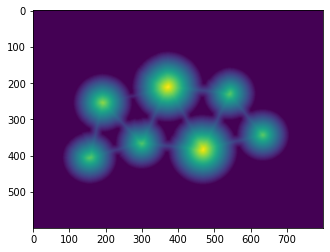

In [8]:
dist = ndi.distance_transform_edt(seg)
plt.imshow(dist);

In [9]:
local_max = peak_local_max(dist, indices = False, min_distance = 20, labels = seg)

<ipython-input-9-91d28e94afd6>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices = False, min_distance = 20, labels = seg)


In [10]:
markers = ndi.label(local_max, structure = np.ones((3,3)))[0]

In [11]:
labels = watershed(-dist, markers, mask=seg)

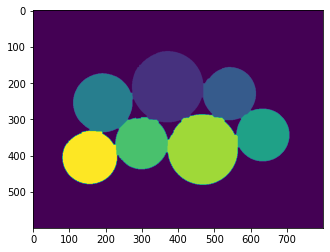

In [12]:
plt.imshow(labels);

In [17]:
img = cv2.imread('/content/imagens/rbc.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)

In [18]:
gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [19]:
def preenche_buraco(img_thresh, limiar = 1000):
  contornos, _ = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  buracos = []
  for con in contornos:
    area = cv2.contourArea(con)
    if area < limiar:
      buracos.append(con)
  cv2.drawContours(img_thresh, buracos, -1, 255, -1)
  return img_thresh    

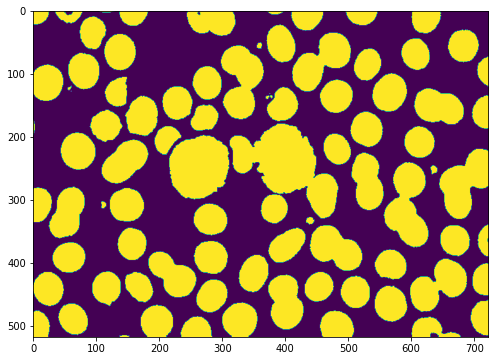

In [20]:
seg = preenche_buraco(thresh)
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.imshow(seg);

In [21]:
dist = ndi.distance_transform_edt(seg)
local_max = peak_local_max(dist, indices = False, min_distance = 20, labels = seg)
markers = ndi.label(local_max, structure = np.ones((3,3)))[0]
labels = watershed(-dist, markers, mask=seg)

<ipython-input-21-6533c2721a71>:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices = False, min_distance = 20, labels = seg)


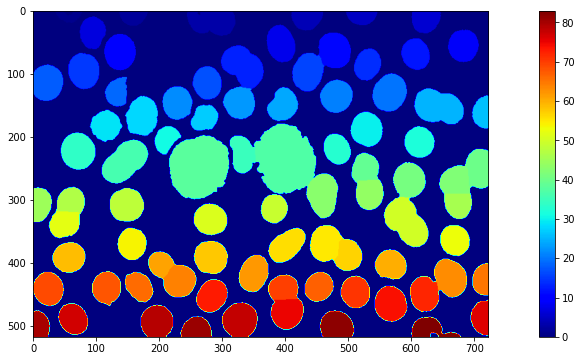

In [23]:
fig = plt.gcf()
fig.set_size_inches(18, 6)
plot = plt.imshow(labels, cmap='jet')
plt.colorbar(plot);

In [29]:
def segmentacao_watershed(link, preenchimento = 1000):
  img = cv2.imread(link)
  original = gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)
  gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

  if preenchimento > 0:
    thresh = preenche_buraco(thresh, preenchimento)
  
  dist = ndi.distance_transform_edt(thresh)
  dist_visual = dist.copy()
  local_max = peak_local_max(dist, indices=False, min_distance = 20, labels = thresh)
  markers = ndi.label(local_max, structure = np.ones((3,3)))[0]
  labels = watershed(-dist, markers, mask=thresh)

  titulos = ['Imagem Original', 'Limiarização (objetos juntos)', 'Distance Transform', 'Watershed (objetos separados)']
  imagens = [original, thresh, dist_visual, labels]

  fig = plt.gcf();
  fig.set_size_inches(16, 12)
  for i in range(4):
    plt.subplot(2,2,i+1)
    if (i==3):
      cmap = 'jet'
    else:
      cmap = 'gray'
    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])
  plt.show()
  return labels

<ipython-input-29-f2438d792291>:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance = 20, labels = thresh)


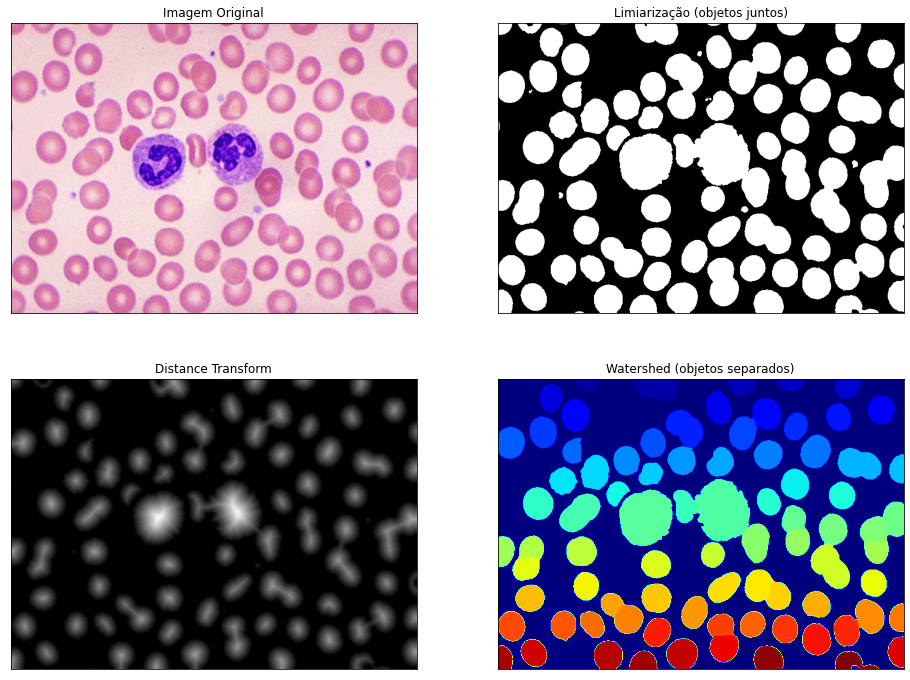

In [30]:
segmentacao = segmentacao_watershed('/content/imagens/rbc.jpg')

<ipython-input-29-f2438d792291>:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance = 20, labels = thresh)


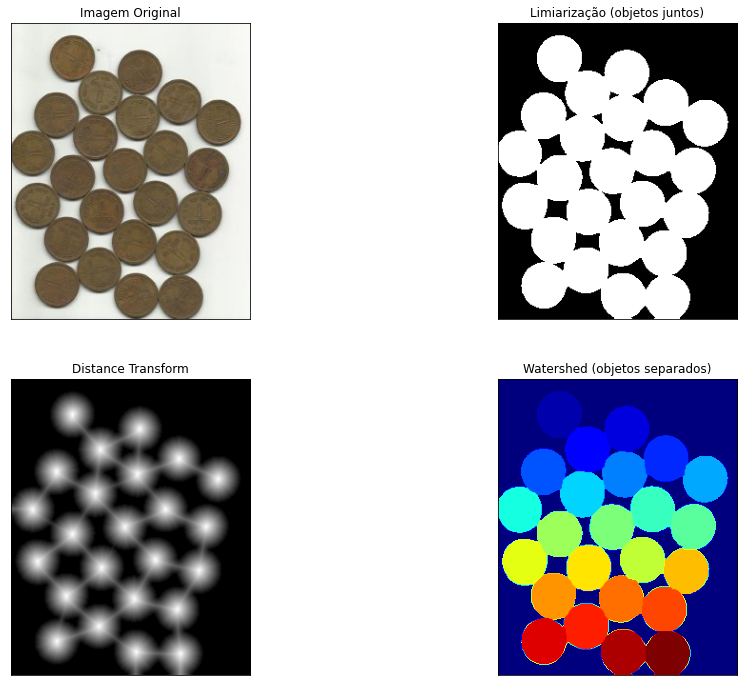

In [31]:
segmentacao = segmentacao_watershed('/content/imagens/moedas04.jpg', 0)

<ipython-input-29-f2438d792291>:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance = 20, labels = thresh)


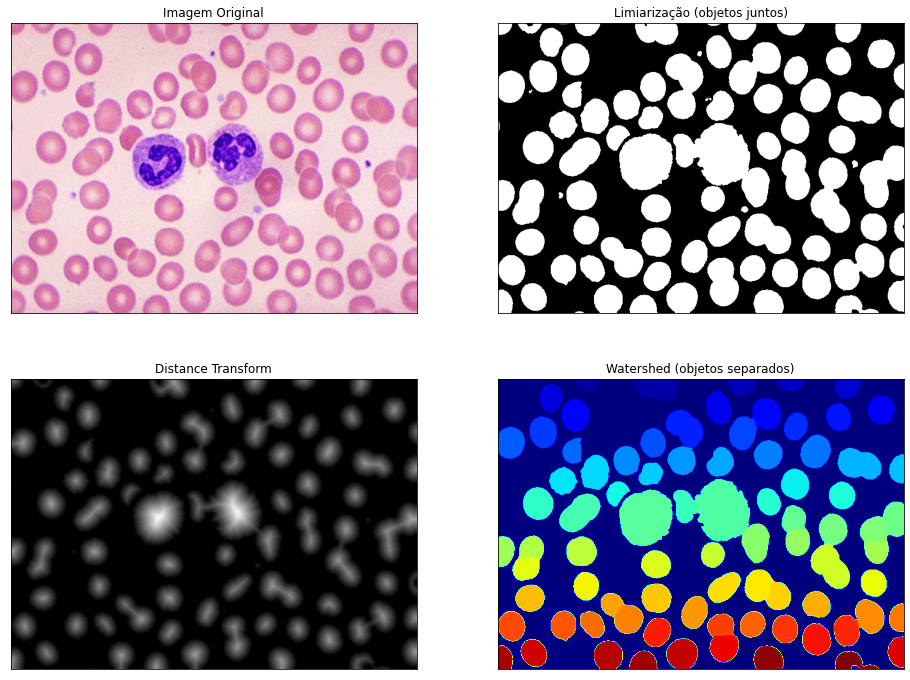

In [48]:
img = cv2.imread('/content/imagens/rbc.jpg')
labels = segmentacao_watershed('/content/imagens/rbc.jpg')
cmap = plt.cm.jet

In [49]:
norm = plt.Normalize(vmin = labels.min(), vmax = labels.max())
seg_watershed = cmap(norm(labels))

In [50]:
seg_watershed = ((seg_watershed * 255).astype(np.uint8))
seg_watershed = cv2.cvtColor(seg_watershed, cv2.COLOR_RGB2BGR)

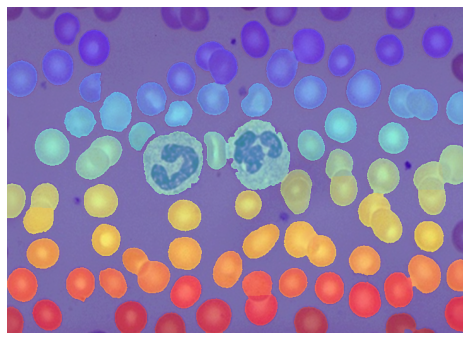

In [51]:
img_sobreposicao = cv2.addWeighted(seg_watershed, 0.5, img, 0.5, 0)
mostrar(img_sobreposicao)

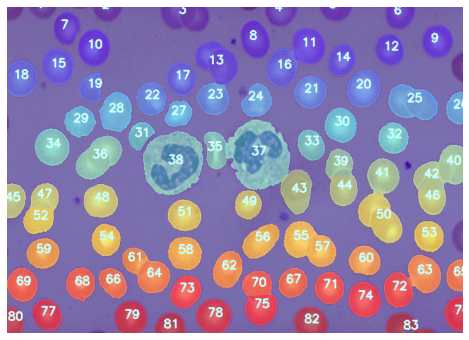

In [52]:
img_final = img_sobreposicao.copy()
for label in np.unique(labels):
  if label == 0:
    continue
  mascara = np.zeros(gray.shape, dtype = 'uint8')
  mascara[labels == label] = 255
  cnts = cv2.findContours(mascara.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]
  c = max(cnts, key=cv2.contourArea)
  ((x, y), r) = cv2.minEnclosingCircle(c)
  cv2.putText(img_final, "{}".format(label), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,200), 2)
mostrar(img_final)